In [47]:
using Plots, Colors, LinearAlgebra
using Printf
using CSV
using DataFrames
import Base.print_matrix

In [2]:
function plot_matrix(matrix)
    gr()
    Plots.heatmap(matrix, c=:thermal, yflip=true) 
end

plot_matrix (generic function with 1 method)

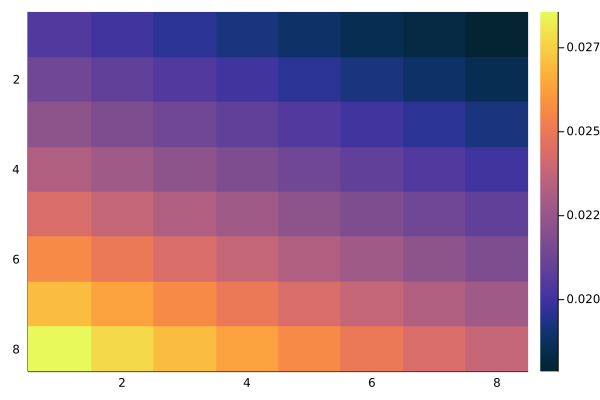

In [3]:
function cauchy_matrix(order)
    #this function creates a cauchy matrix of order x
    matrix_array = [] #we will fill this array
    for i in 1:order #x-number of lines
        row = [] #empty array to store the row
        for j in 1:order #x-number of columns
            xi = i+50-j
            yi = j
            if xi==yi
               print("They are the same") 
            end
            append!(row, 1/(xi-yi))
        end
        matrix_array = vcat(matrix_array, row) #filling the matrix row by row
    end
    matrix_array = reshape(matrix_array, (order,order))
    matrix_array = real(matrix_array)    
    return matrix_array
end

cauchy = cauchy_matrix(8)
plot_matrix(cauchy)

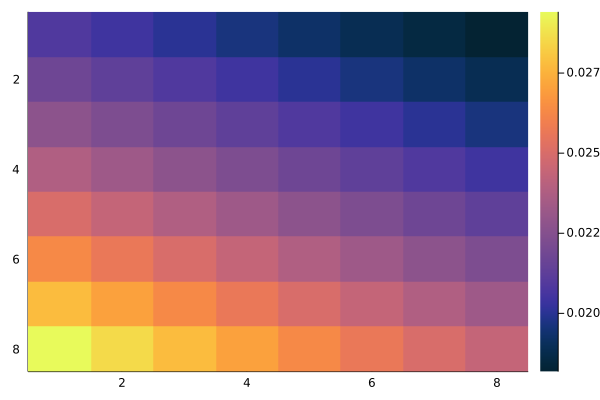

In [4]:
function hilbert_matrix(order)
    #this function creates a hilbert matrix of order x
    matrix_array = [] #we will fill this array
    for i in 1:order #x-number of lines
        row = [] #empty array to store the row
        for j in 1:order #x-number of columns
            xi = i+50-j
            yi = j
            if xi==yi
               print("They are the same") 
            end
            append!(row, 1/(xi-yi-1))
        end
        matrix_array = vcat(matrix_array,row) #filling the matrix row by row
    end
    matrix_array = reshape(matrix_array, (order,order))
    matrix_array = real(matrix_array)    
    return matrix_array
end

hilbert = hilbert_matrix(8)
plot_matrix(hilbert)

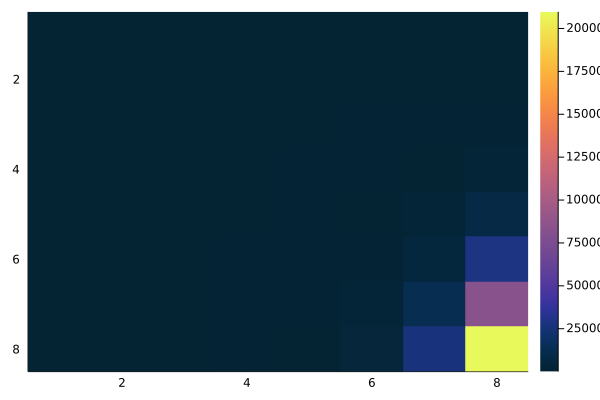

In [6]:
function vandermonde_matrix(order)
    #this function creates a vandermonde matrix
    matrix_array = [] #we will fill this array
    for i in 1:order #x-number of lines
        row = [] #empty array to store the row
        for j in 1:order #x-number of columns
            append!(row, j^(i-1))
        end
        matrix_array = vcat(matrix_array, row) #filling the matrix row by row
    end
    matrix_array = reshape(matrix_array, (order,order))
    matrix_array = real(matrix_array)    
    return matrix_array
end

vandermonde = vandermonde_matrix(8)
plot_matrix(vandermonde)

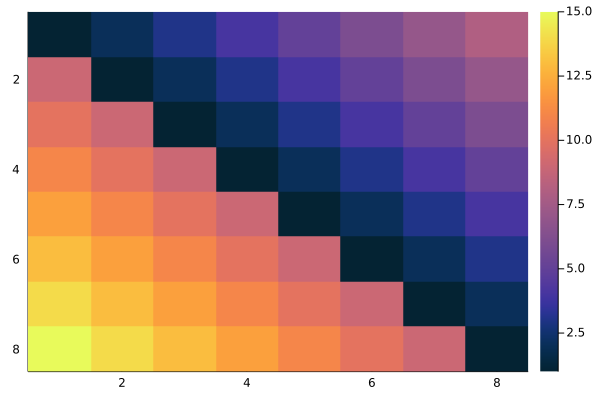

In [7]:
function toeplitz_matrix(order)
    empty_array = [] #matrix array holder
    reference_array = [z for z in 1:(order*2)] #the 15 elements of the array
    for j in 1:order #runs through the columns
        row = []
        for i in 1:order #runs through the reference_array indexes
            if i == j #if main diagonal
                a = reference_array[1:1]
                append!(row, a)
            elseif i > j #if row index greater than column index
                a = reference_array[(i+order-j):(i+order-j)]
                append!(row, a)
            else #if column index is greater than row index
                a = reference_array[(j-i+1):(j-i+1)]
                append!(row, a)
            end
        end
        empty_array = vcat(empty_array, row)
    end
    empty_array = reshape(empty_array, (order,order))
    empty_array = real(empty_array)
    return empty_array
end

toeplitz = toeplitz_matrix(8)
plot_matrix(toeplitz)

In [8]:
toeplitz

8×8 Matrix{Int64}:
  1   2   3   4   5   6  7  8
  9   1   2   3   4   5  6  7
 10   9   1   2   3   4  5  6
 11  10   9   1   2   3  4  5
 12  11  10   9   1   2  3  4
 13  12  11  10   9   1  2  3
 14  13  12  11  10   9  1  2
 15  14  13  12  11  10  9  1

In [9]:
#demo_matrix = [[1,2,-1,2,2] [0,5,2,1,3] [4,0,3,-2,-1] [-6,3,5,3,-2] [0,2,1,-4,3]]
#demo_matrix = [[1,2,-1,2] [0,5,2,1] [4,0,3,-2] [-6,3,5,3]]
#demo_matrix = [[1,2,0] [3,2,1] [1,1,1]]
demo_matrix = [[1,2] [3,1]]
demo_matrix

2×2 Matrix{Int64}:
 1  3
 2  1

In [10]:
det(demo_matrix)

-5.0

In [11]:
function laplace_determinant(matrix, pivot=1, cummulative=0, power=1)
    #function to calculate laplace determinant on the input matrix.
    #standard pivot is 1, but this will change as soon as the function is called.
    #1) We start at a pivot, eliminate rows and columns at that pivot.
    #if size(matrix)[1] > 2 #the minimum shape for Laplace is 2x2. Otheriwse keep iterating.
    if size(matrix)[1] > 2
        for col_pos in 1:size(matrix)[2] #pretend we will only walk in the columns first and recur
            pivot = matrix[1:1, col_pos:col_pos] #this is the new pivot
            inside_matrix = matrix[1:end .!= 1, :] #always delete that first row (thinking about 3x3)
            inside_matrix = inside_matrix[:, 1:end .!= col_pos] #now delete the row you're currently on
            #println("")
            #print_matrix(stdout,inside_matrix)
            #println("")
            cummulative += (-1)^(power+1) * pivot[1] * laplace_determinant(inside_matrix, pivot,0,col_pos)[1] #call our recursion
            #println("")
            #@printf "Now cummulative is %s and pivot used was %s" cummulative pivot
        end
    else
        #println("")
        #@printf "Add %s, also power is %s" (-1)^(power+1) * det(matrix) power
        return (-1)^(power+1) * det(matrix) #return nothing for the meantime
    end
    #println("")
    #println("Break")
    #@printf "At the end cummulative is %s" cummulative
    return cummulative
end

determinant = laplace_determinant(demo_matrix)

-5.0

In [12]:
function cramer_rule(matrix)
    """
    function created to execute cramer's rule on the matrixes
    Cramer rule works by replacing the result vector on the index of the role,
    you want to determine the coefficient. That replaced matrix is determinant
    is called Di, where i is the index, and the variable you want to calculate
    is just xi = Di/D, where D is the determinant of the original variable.
    
    Remembering our initial proposal is to solve a Ax=b system.
    """
    #first we obtain the b vector using x=[1,1,...,1] values.
    matrixSize = size(matrix)[1] #number of columns to fill the x vector
    xVector = [1 for x=1:matrixSize] #fill the array with 1s
    bVector = matrix*xVector #obtain the b vector
    calculated_x_vector = [] #the values we will calculate
    d_determinant = laplace_determinant(matrix) #get the matrix's determinant
    for i in 1:matrixSize #run a loop to obtain i calculated variables
        matrix_copy = copy(matrix) #so we don't change the original matrix
        matrix_copy[1:end,i:i] = bVector #replace the ith column with this vector
        determinant_i = laplace_determinant(matrix_copy)
        unknown_i = determinant_i/d_determinant
        append!(calculated_x_vector, unknown_i)
        #println("")
        #println("----")
        #print_matrix(stdout, matrix_copy)
    end
    return calculated_x_vector
end

cramer_rule (generic function with 1 method)

In [13]:
cramer = cramer_rule(hilbert)

8-element Vector{Any}:
  2.437226244943499
  2.1976428742283485
 -5.593303721976655
 -7.287665169501066
 14.11164554520387
 -5.533089587381518
  1.1442539281958217
 -2.505725730503931

In [45]:
cauchy_arr = []
hilbert_arr = []
vander_arr = []
toeplitz_arr = []
for rank in 1:8
    append!(cauchy_arr, error_calculation(cramer_rule(cauchy_matrix(rank))))
    append!(hilbert_arr, error_calculation(cramer_rule(hilbert_matrix(rank))))
    append!(vander_arr, error_calculation(cramer_rule(vandermonde_matrix(rank))))
    append!(toeplitz_arr, error_calculation(cramer_rule(toeplitz_matrix(rank))))
end
out = hcat(cauchy_arr, hilbert_arr, vander_arr, toeplitz_arr)

8×4 Matrix{Float64}:
  0.0           0.0          0.0          0.0
  7.48078e-26   1.20105e-26  2.46519e-32  0.0
  1.16718e-14   1.01977e-14  5.52203e-30  6.57384e-32
  3.84659e-5    0.000139181  1.11334e-29  6.47112e-32
  2.90723      13.4862       1.86776e-24  1.97215e-32
 48.3465        3.56942      6.97816e-21  1.84889e-32
 73.3545       32.9835       5.11994e-17  1.26781e-31
  5.30837      42.8206       2.77184e-12  7.39557e-32

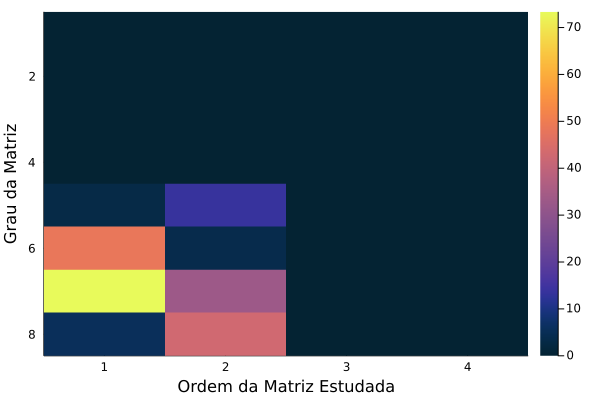

In [48]:
gr()
Plots.heatmap(out, c=:thermal, yflip=true) 
#plot(determinant_arr, title="EQM por Grau das Matrizes")
#plot!(normal_arr, label="Hilbert")
xlabel!("Ordem da Matriz Estudada")
ylabel!("Grau da Matriz")

In [35]:
function error_calculation(vector1)
    #function created to compare the errors from the calculated vectors
    accumulated_error = 0 #create the variable we will sum to
    for vector in vector1 #run the vector with the stored results
        accumulated_error += (vector - 1)^2
    end
    accumulated_error /= size(vector1)[1]
    return accumulated_error
end

error_calculation (generic function with 1 method)

In [36]:
error1 = error_calculation(cramer_rule(toeplitz))

7.395570986446986e-32

## **Blind Source Separation**

In [173]:
#add packages
using Random
using LinearAlgebra
using TSVD

LoadError: ArgumentError: Package StatsBase not found in current path:
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.


In [160]:
s1 = cos.(0:pi/2:6pi) #create what would be a cos function
s2 = sin.(0:pi/2:6pi) #create what would be a sin function
s3 = [(1/x)*sin(x) for x in 1:13] #create what would an abnormal function
out = vcat(s1,s2,s3) #concatenate
noise = [x*0.3*rand(1,2)[1] for x in out] #add noise to the result
noise = reshape(this, (13,3))

#First we rearrange our matrix
c_mat = transpose(noise)*noise

#Now we implement the power method to calculate eigenvalues
function power_method(matrix)
   #function created to use the power method and calculate dominant eigenvector
    threshold = 0.0001 #when are we happy with the result
    error = 99 #so we can stop the iterations
    guess_vector_x = reshape([1 for x in 1:size(matrix)[1]],(size(matrix)[1],1))
    lambda = 1 #create lambda
    order_matrix = size(matrix)[1] #get matrix's order
    while error > threshold #run until our result is sufficient
        #println("")
        #println("New Iteration: --->")
        new_guess_vector = matrix * guess_vector_x #create the new matrix
        guess_vector_x = new_guess_vector #replace our old vector
        new_lambda = maximum.(abs.(guess_vector_x)) #get the maximum lambda
        new_lambda = new_lambda[1]
        guess_vector_x = guess_vector_x ./ new_lambda #divide by maximum lambda
        error = new_lambda .- lambda
        error = abs(error[1])
        lambda = new_lambda
        lambda = lambda[1]
        #@printf "Lambda: %s, Error: %s and EE: %s" lambda error maximum(abs.(eigvals(matrix)))[1]
        #println("")
    end
    return reshape(guess_vector_x, (3,1)), lambda
end

#run the function
d_eigenvec, d_eigenval = power_method(c_mat) #now we have dominant eigvec

([1.0; 0.005119182971504125; -0.017038288535034196], 0.26412892462049337)

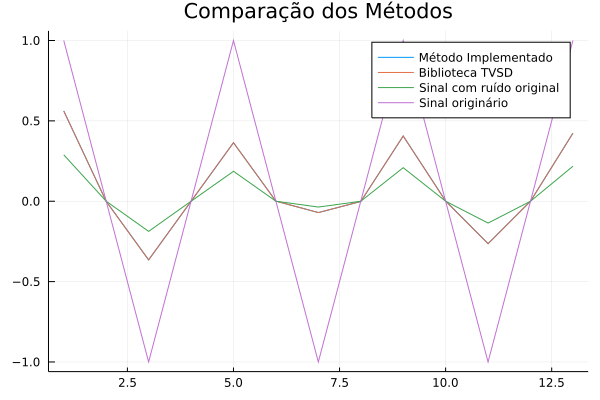

In [161]:
sigma = hcat(d_eigenval^0.5)
u_1 = (1/sigma[1])*noise*d_eigenvec
trans = transpose(d_eigenvec)
yasmim = u_1*sigma*trans

result2 = tsvd(noise)[1]
gr()
plot(u_1, label="Método Implementado", title="Comparação dos Métodos")
plot!(result2*(-1), label="Biblioteca TVSD")
plot!(noise[1:end, 1:1], label="Sinal com ruído original")
plot!(s1, label="Sinal originário")

In [216]:
this = 0
for x in 1:13
   this += (s1[x:x, 1:1][1] - u_1[x:x, 1:1][1])^2
end

In [217]:
this/13

0.23772086674362838